# Machine Learning con atributos para clasificación de tweets por polaridad

En este laboratorio se trabajará con un corpus creado a partir de los corpus del TASS (2017 y 2018) (http://www.sepln.org/workshops/tass/).



In [ ]:
# Ejecutar este fragmento si se ejecuta en colab
# Debes autorizar a colab a acceder a tus archivos
from google.colab import drive
import os
drive.mount('/lab')

# En esta variable va la carpeta donde están los laboratorios
carpeta_laboratorios = ''

path_laboratorios = '/lab/My Drive/' + carpeta_laboratorios + '/'
print('Los archivos en tu carpeta de laboratoros son:')
os.listdir(path_laboratorios)

# Carga de la información de los tweets

Complete el siguiente código de modo de cargar un corpus (archivo csv) y retornar un vector con los tweets y un vector con las polaridades.

In [26]:
import csv
import numpy as np
        
def load_corpus(corpusFile):
    with open(corpusFile, encoding='utf8', newline='') as csvfile:
        tweets = list(csv.reader(csvfile, delimiter=','))
    polarities = [] # polaridades
    originalTweets = [] # tweets
    
    for t in tweets:
        polarities += [t[2]]
        originalTweets += [t[1]]

    return np.asarray(originalTweets), np.asarray(polarities)



# Word embeddings

A continuación se generarán features a partir de un modelo de word embeddings.

Para esto debe tener en su directorio de trabajo los archivos emb39word2vec.ny y emb39word2vec.txt, que contienen información sobre los vectores asociados a cada palabra. También necesitará el script load_vectors.py que contiene una función para cargar el modelo vectorial.

Luego se grafican algunas palabras.


In [5]:
def load_model():
    """
    Carga el modelo de embeddings desde el archivo emb39-word2vec
    """
#   file_name = path_laboratorios + 'emb39-word2vec'
    file_name = 'emb39-word2vec'
    fname_txt = file_name + '.txt'
    fname_npy = file_name + '.npy'

    # load npy and txt
    npy = np.load(fname_npy)
    txt = open(fname_txt, encoding='utf-8').read().splitlines()  

    # index str
    w2ind = dict()
    for ind, wd in enumerate(txt):
        w2ind[wd] = ind

    # w2v function
    def w2v(wd):
        default_vector = np.zeros(len(npy[0]))
        try:
            return npy[w2ind[wd]]
        except KeyError:
        #      print (wd + ' not found in vecset')
          return default_vector

    wd2vect = w2v
    wd2vect.name = file_name
    wd2vect.dim = len(npy[0])
    return wd2vect

# cargo el modelo vectorial para usar en diferentes secciones del notebook
model = load_model()


(8, 300)


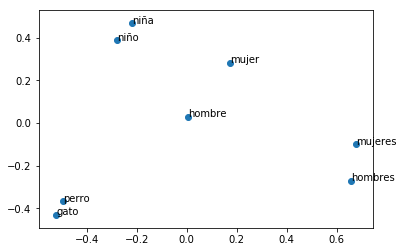

In [6]:
# Grafica de palabras relacionadas con representación de embeddings
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

palabras = ['mujer', 'mujeres', 'niña', 'hombre', 'hombres', 'niño', 'perro', 'gato']
representacion = np.array([model(palabra) for palabra in palabras])

print(representacion.shape)
pca = PCA(n_components=2)
representacion_simplificada = pca.fit_transform(representacion)

plt.scatter(representacion_simplificada[:, 0], representacion_simplificada[:, 1])
for i, palabra in enumerate(palabras):
    plt.annotate(palabra, xy=representacion_simplificada[i])
plt.show()

# Vector promedio de un texto

A continuación se define una función para calcular el vector promedio de cada tweet, que luego se utilizará para generar las features.


In [7]:
def mean_vector_text(text):
    
    vectors = [model(word) for word in text if model(word).any()]
    meanvec = (sum(vectors) / len(vectors)) if vectors else np.zeros(300)

    return meanvec


# pruebe la función mean_vector_text con los siguientes textos: 
# ['estoy', 'en', 'la', 'facultad', 'trabajando']
# ['facxladtx']

### completar
l = [['estoy', 'en', 'la', 'facultad', 'trabajando'],['facxladtx']]
for elem in l:
    print(mean_vector_text(elem))


[ 0.00527743 -0.03051847 -0.01805547 -0.02098807 -0.04683763  0.00188828
 -0.02506027  0.04744087  0.00478126 -0.00253134 -0.03299621  0.01502636
  0.02851687 -0.07468277 -0.01060372  0.01130159  0.02280355  0.02672255
  0.04970116 -0.02191514 -0.00605631 -0.05664644 -0.10332838  0.05276635
 -0.03397691  0.00046597 -0.02246946  0.10044108 -0.00227039 -0.00092573
  0.00085187 -0.07631031 -0.03944316 -0.00296119 -0.01257322 -0.02241019
 -0.02697387  0.03546646 -0.01543499 -0.00178003  0.00600316 -0.05978292
 -0.00017447  0.00107361  0.02142896  0.03467507 -0.00762874  0.03775651
 -0.00659085 -0.01280627 -0.03738788  0.02318161  0.02570691  0.02018406
 -0.02302102  0.0133812   0.00510983  0.04232084  0.01205959 -0.01071621
 -0.09970403  0.00477162  0.0433399   0.01505148  0.01839053  0.00470628
  0.00989132 -0.03235792  0.03434866  0.00882624  0.03168901  0.01278815
  0.0094336  -0.01967809  0.03866809 -0.01264531 -0.083662    0.01362212
 -0.03618283  0.01253533 -0.06172826  0.01054669 -0

# Generación de features 

En este bloque se cargan los corpus de tweets y se calcula el vector promedio de cada tweet.

Los 300 valores reales correspondientes al vector promedio de un twwet serán las features para entrenamiento.

Luego de generar las features, pruebe los clasificadores de la última sección del notebook.


In [28]:
# cargar info de los corpus train (para entrenar) y devel (para evaluar experimentos) 
# origTrain, polTrain = load_corpus(path_laboratorios + 'train3000.csv')
# origDevel, polDevel = load_corpus(path_laboratorios + 'devel.csv')
origTrain, polTrain = load_corpus('train3000.csv')
# origTrain, polTrain = load_corpus('train.csv')
origDevel, polDevel = load_corpus('devel.csv')

# imprima algunos tweets y su polaridad para verificar que la carga del corpus sea correcta

### completar
print(origTrain.shape)
print(origDevel.shape)


# generación de features: 
# para cada tweet se van a generar 300 features, 
# que son los 300 valores reales del vector promedio 
# de los vectores de todas las palabras del tweet

# completar función para calcular el mean vector de cada tweet de un corpus
def tweetsMeanVec(tweets):

    ### completar
    twsMV = [mean_vector_text(t) for t in tweets]

    return np.asarray(twsMV)

# genere las features para los tweets del corpus 'train'
trainMV = tweetsMeanVec(origTrain)


# genere las features para los tweets del corpus 'devel'
develMV = tweetsMeanVec(origDevel)


# imprima los tamaños de las matrices generadas 

### completar
print(trainMV.shape)
print(develMV.shape)

(2943,)
(1133,)
(2943, 300)
(1133, 300)


# Léxico subjetivo

En esta sección vamos a incluir features basadas en un léxico subjetivo, además de las features basadas en el vector promedio del tweet.

El léxico contiene todas las formas correspondientes a cada lema. Está organizado en dos archivos csv, uno con palabras positivas y otro con palabras negativas.

Se provee una función para cargar el léxico.

Piense de qué forma usar el léxico para generar features, aplicando alguna de las ideas siguientes (u otras): contar cantidad de palabras incluidas en los léxicos, calcular distancias de las palabras del tweet a las palabras de los léxicos (usando los embeddings) o al vector promedio de cada léxico, calcular distancia del vector promedio del tweet a las palabras del léxico, etc. 


Luego vuelva a probar los dos clasificadores de la última sección.


In [42]:
from numpy import dot
from numpy.linalg import norm
import scipy

def read_lexicon(lex_file):
    # cargo lexico
    with open(lex_file, encoding='utf8') as lex:
        lex_list = []
        for word in lex:
            lex_list.append(word.rstrip('\r\n').lower())
    return lex_list

def getLexFeats(tweets, posLex, negLex, feats):
    # aplique alguna idea de las sugeridas u otras que usted defina para calcular features basadas en léxicos
    posLexMeanWE = mean_vector_text(posLex)
    negLexMeanWE = mean_vector_text(negLex)
#     print(posLexMeanWE)
#     print(negLexMeanWE)
    
    ### completar
    res = np.zeros((np.shape(tweets)[0],4))
    print(np.shape(res))
    ### completar
    for i,t in enumerate(tweets):
        for w in t.split():
            if w in posLex:
                res[i,0] += 1
            if w in negLex:
                res[i,1] += 1
        distPos = dot(feats[i], posLexMeanWE)/(norm(feats[i])*norm(posLexMeanWE))
        distNeg = dot(feats[i], negLexMeanWE)/(norm(feats[i])*norm(negLexMeanWE))
        res[i,2] = distPos
        res[i,3] = distNeg
    print(res.shape)
    return res
    


# construyo features basadas en léxicos para train y devel
# cargo léxicos
# posLex = set(read_lexicon(path_laboratorios + 'lexico_pos_palabras_grande.csv'))
# negLex = set(read_lexicon(path_laboratorios + 'lexico_neg_palabras_grande.csv'))
posLex = set(read_lexicon('lexico_pos_palabras_grande.csv'))
negLex = set(read_lexicon('lexico_neg_palabras_grande.csv'))

# obtengo features para train y devel
lexFeatsTrain = getLexFeats(origTrain, posLex, negLex, trainMV)
lexFeatsDevel = getLexFeats(origDevel, posLex, negLex, develMV)


# verifico los valores obtenidos
print("=>",trainMV.shape)
print("=>",lexFeatsTrain.shape)


# combino features obtenidas a partir del vector promedio con features basadas en léxico
trainMVLex = np.hstack((trainMV, lexFeatsTrain))
develMVLex = np.hstack((develMV, lexFeatsDevel))
# trainMVLex = scipy.sparse.hstack((trainMV, lexFeatsTrain))
# develMVLex = scipy.sparse.hstack((develMV, lexFeatsDevel))


# verifico dimensiones
print("1",origTrain.shape)
print("2",origDevel.shape)
print("3",trainMVLex.shape)
print("4",develMVLex.shape)



(2943, 4)
(2943, 4)


/Users/Bruno/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/Bruno/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in double_scalars


(1133, 4)
(1133, 4)
=> (2943, 300)
=> (2943, 4)
1 (2943,)
2 (1133,)
3 (2943, 304)
4 (1133, 304)


# Clasificadores

Entrene dos clasificadores: Multilayer Perceptron y SVM para probar las diferentes configuraciones de features que desee.

Imprima accuracy de cada clasificador.


In [51]:
# clasificadores

# Normalización de atributos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(trainMV)
X_devel = scaler.transform(develMV)

# Para un segundo experimento usando el léxico, utilice estas features
trainMVLex[np.isnan(trainMVLex)] = 0
develMVLex[np.isnan(develMVLex)] = 0
X_train_lex = scaler.fit_transform(trainMVLex)
X_devel_lex = scaler.transform(develMVLex)


# Multi Layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(150,100,50), max_iter=500)
clf_mlp_lex = MLPClassifier(activation='logistic', hidden_layer_sizes=(150,100,50), max_iter=500)
## utilice fit para entrenar y score para obtener la accuracy
### completar
clf_mlp.fit(X_train,polTrain)
print("MLP: ",clf_mlp.score(X_devel, polDevel))
clf_mlp_lex.fit(X_train_lex,polTrain)
print("MLP (+lex): ",clf_mlp_lex.score(X_devel_lex, polDevel))


# SVM
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm_lex = SVC()
## utilice fit para entrenar y score para obtener la accuracy
### completar
clf_svm.fit(X_train,polTrain)
print("SVM: ", clf_svm.score(X_devel, polDevel))
clf_svm_lex.fit(X_train_lex,polTrain)
print("SVM (+lex): ", clf_svm_lex.score(X_devel_lex, polDevel))

MLP:  0.317740511915
MLP (+lex):  0.364518976169
SVM:  0.406884377758
SVM (+lex):  0.499558693733


# Preguntas finales

1. ¿Qué features son mejores para cada clasificador?

2. Calcule precision, recall y F1 para cada clase, analice para qué clase se obtienen los mejores/peores resultados.

3. Elija los mejores atributos para cada clasificador y evalúe sobre el corpus 'test'.

4. Opcional: Pruebe otras combinaciones de features y otros clasificadores.
